In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

#imports
#numpy pandas scipy math matplotlib

import scipy
import math
from math import sqrt


#estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#cross validation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import svm

In [4]:
CL = pd.read_csv('Crude Oil WTI Futures Historical Data.csv', header =1, index_col='Date',parse_dates=True)
HO = pd.read_csv('Heating Oil Futures Historical Data.csv', header =1)
RBOB = pd.read_csv('Gasoline RBOB Futures Historical Data.csv', header =1)

In [5]:
CL.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-03-24,99.60,99.49,100.29,99.05,151710.00,0.14%
2014-03-25,99.19,99.43,100.25,98.80,217010.00,-0.41%
2014-03-26,100.26,99.18,100.46,99.10,211370.00,1.08%
2014-03-27,101.28,100.30,101.70,100.03,202200.00,1.02%
2014-03-28,101.67,101.34,102.24,101.18,166330.00,0.39%


In [6]:
CL.describe()

,Price,Open,High,Low
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,58.195142,58.231525,59.028767,57.375815
std,17.578766,17.582209,17.539188,17.587380
min,26.210000,27.300000,27.480000,26.050000
25%,46.997500,46.900000,47.785000,45.912500
50%,52.705000,52.670000,53.470000,52.050000
75%,65.457500,65.317500,66.030000,64.327500
max,107.260000,107.420000,107.730000,106.570000


In [7]:
CL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1338 entries, 2014-03-24 to 2019-04-22
Data columns (total 6 columns):
Price       1338 non-null float64
Open        1338 non-null float64
High        1338 non-null float64
Low         1338 non-null float64
Vol.        1338 non-null object
Change %    1338 non-null object
dtypes: float64(4), object(2)
memory usage: 73.2+ KB


In [9]:
CL["Price"] = CL["Price"].astype('int')
CL["Open"] = CL["Open"].astype('long')
CL["High"] = CL["High"].astype('long')
CL["Low"] = CL["Low"].astype('long')


Text(0, 0.5, 'Price')

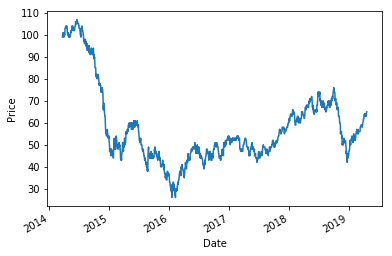

In [10]:
CL['Price'].plot()
plt.xlabel('Date')
plt.ylabel('Price')


In [11]:
CL['HL_PCT'] = (CL['High'] - CL['Low']) / CL['Price'] * 100.0

In [12]:
CL['PCT_change'] = (CL['Price'] - CL['Open']) / CL['Open'] * 100.0

In [13]:
CLframe = CL[['Price', 'HL_PCT', 'PCT_change']]

In [14]:
forecast_col = 'Price'

In [15]:
CLframe.fillna(value=-99999, inplace=True)

C:\Users\garre\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [16]:
forecast_out = int(math.ceil(0.01 * len(CLframe)))

In [17]:
CLframe['label'] = CLframe[forecast_col].shift(-forecast_out)

C:\Users\garre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
X = np.array(CLframe.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [19]:
CLframe.dropna(inplace=True)

C:\Users\garre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
y = np.array(CLframe['label'])

In [21]:
X_train = X[: 940]
y_train = y[: 940]
X_test = X[-398:]
y_test = y[-398:]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

In [23]:
forecast_set = clf.predict(X_lately)
CLframe['Forecast'] = np.nan

C:\Users\garre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
last_date = CLframe.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    CLframe.loc[next_date] = [np.nan for _ in range(len(CLframe.columns)-1)]+[i]

C:\Users\garre\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


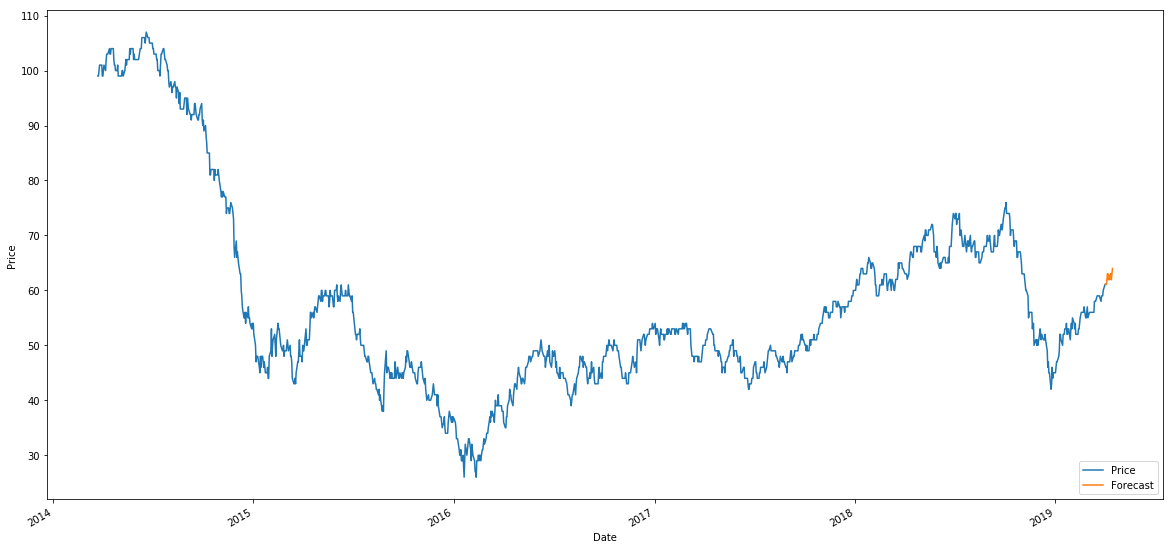

In [34]:
CLframe['Price'].plot()
CLframe['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = 10,25


In [133]:
print(CLframe['Forecast'])

Date
2014-03-24 00:00:00          NaN
2014-03-25 00:00:00          NaN
2014-03-26 00:00:00          NaN
2014-03-27 00:00:00          NaN
2014-03-28 00:00:00          NaN
2014-03-31 00:00:00          NaN
2014-04-01 00:00:00          NaN
2014-04-02 00:00:00          NaN
2014-04-03 00:00:00          NaN
2014-04-04 00:00:00          NaN
2014-04-07 00:00:00          NaN
2014-04-08 00:00:00          NaN
2014-04-09 00:00:00          NaN
2014-04-10 00:00:00          NaN
2014-04-11 00:00:00          NaN
2014-04-14 00:00:00          NaN
2014-04-15 00:00:00          NaN
2014-04-16 00:00:00          NaN
2014-04-17 00:00:00          NaN
2014-04-21 00:00:00          NaN
2014-04-22 00:00:00          NaN
2014-04-23 00:00:00          NaN
2014-04-24 00:00:00          NaN
2014-04-25 00:00:00          NaN
2014-04-28 00:00:00          NaN
2014-04-29 00:00:00          NaN
2014-04-30 00:00:00          NaN
2014-05-01 00:00:00          NaN
2014-05-02 00:00:00          NaN
2014-05-05 00:00:00          NaN
     